In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

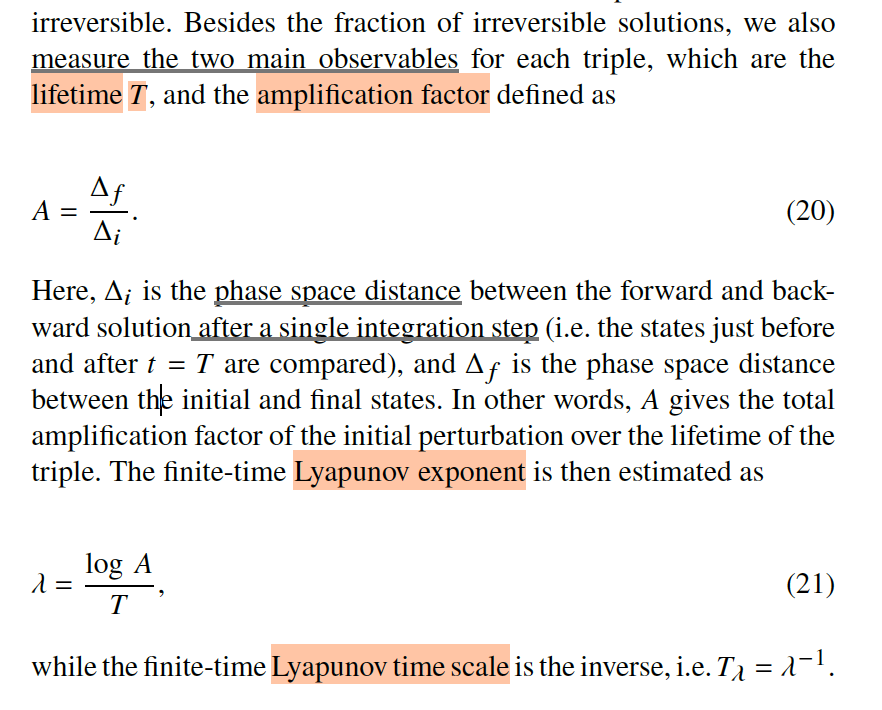

In [42]:
df = pd.read_csv('./Brutus data/plummer_triples_L0_00_i1775_e90_Lw392.csv')

forward_trajectory = df[df['Phase'] == 1]
backward_trajectory = df[df['Phase'] == -1]

total_timesteps = len(df['Timestep'].unique())
midpoint = total_timesteps // 2  # Midpoint corresponds to t=T=lifetime
timesteps = df['Timestep'].unique()
print('Total timesteps:', total_timesteps)

particles = df['Particle Number'].unique()

# Phase space distance between two states
def compute_delta(forward_state, backward_state):
    # Extract positions
    x_f, y_f, z_f = forward_state['X Position'].values, forward_state['Y Position'].values, forward_state['Z Position'].values
    x_b, y_b, z_b = backward_state['X Position'].values, backward_state['Y Position'].values, backward_state['Z Position'].values

    # Extract velocities
    vx_f, vy_f, vz_f = forward_state['X Velocity'].values, forward_state['Y Velocity'].values, forward_state['Z Velocity'].values
    vx_b, vy_b, vz_b = backward_state['X Velocity'].values, backward_state['Y Velocity'].values, backward_state['Z Velocity'].values

    # Compute the phase-space distance for this particle
    diff_vel = (vx_f - vx_b)**2 + (vy_f - vy_b)**2 + (vz_f - vz_b)**2
    diff_pos = (x_f - x_b)**2 + (y_f - y_b)**2 + (z_f - z_b)**2
    
    return np.sum(diff_vel + diff_pos)

# We want to compute delta btw backward and forward solutions at each integration step
# We need to consider the states symetrically around the midpoint
# backward state = total timesteps - 1 - current forward state
# forward state = current forward state (until midpoint)
delta_per_step = []
for p in particles:
    delta_sum = 0
    forward_p = forward_trajectory[forward_trajectory['Particle Number'] == p]
    backward_p = backward_trajectory[backward_trajectory['Particle Number'] == p]

    for i in range(len(timesteps) // 2):
        forward_state = forward_p[forward_p['Timestep'] == timesteps[i]]
        backward_state = backward_p[backward_p['Timestep'] == timesteps[total_timesteps - 1 - i]]
        delta = compute_delta(forward_state, backward_state)
        # We need to have a single value by summing over the bodies
        delta_sum += delta
        delta_per_step.append(delta_sum)
print('Delta per step:', delta_per_step)
print('len delta step:',len(delta_per_step))



# We want to compute delta between initial and final states
delta_initial_final = 0

for p in particles:
    forward_p = forward_trajectory[forward_trajectory['Particle Number'] == p]
    backward_p = backward_trajectory[backward_trajectory['Particle Number'] == p]
    
    # Initial state from forward trajectory
    forward_initial = forward_p[forward_p['Timestep'] == 0]
    
    # Final state from backward trajectory
    max_backward_timestep = backward_p['Timestep'].max()
    backward_final = backward_p[backward_p['Timestep'] == max_backward_timestep]
    
    delta_initial_final += compute_delta(forward_initial, backward_final)

print(f'Delta^2 between initial and final states: {delta_initial_final}')

# Amplification factor for each integration step
A = [delta_initial_final/delta_per_step[i] for i in range(len(delta_per_step))]
print('Amplification factor:', A)
print('len A:',len(A))

# Amplification factor evolution over lifetime
""" plt.figure(figsize=(10, 6))
plt.plot(timesteps, A, marker='o', linestyle='-', color='b')
plt.xlabel('Timestep')
plt.ylabel('Amplification Factor')
plt.title('Evolution of Amplification Factor over Lifetime T')
plt.grid(True)
plt.show() """

Total timesteps: 9405
Delta per step: [0.624557791675682, 1.1634818193282321, 1.6381687549100539, 2.0683381219865518, 2.472990584026503, 2.871192751307441, 3.28357074784733, 3.7341035247639787, 4.253261430662342, 4.884231436648944, 5.696250172483606, 6.817856245694106, 8.570201731864746, 12.278350136919045, 13.427685821203232, 19.404103350002057, 19.542681062500037, 24.399583160417876, 25.250765127741037, 26.387446052259776, 30.423134343180127, 30.945688920001277, 35.21692164171664, 36.22610809446851, 37.538298474840516, 41.11201084763782, 41.90081845636445, 45.84514317802996, 47.03716593573517, 48.50785241792772, 51.80877141544547, 52.86604801290268, 56.513232560208806, 57.94119748999218, 59.60352044140998, 62.691517702071465, 64.11768112525351, 67.38410908313566, 69.23588944421988, 71.25728222682883, 74.1791118775839, 76.60289480716126, 78.62969137593177, 94.08871334216178, 94.957932930306, 100.05796157059802, 100.22008628488355, 101.86535934682811, 102.10343062443701, 102.7373995867

" plt.figure(figsize=(10, 6))\nplt.plot(timesteps, A, marker='o', linestyle='-', color='b')\nplt.xlabel('Timestep')\nplt.ylabel('Amplification Factor')\nplt.title('Evolution of Amplification Factor over Lifetime T')\nplt.grid(True)\nplt.show() "